<h1><center>Аттестация по ML. Практическое задание</center></h1>
<h2><center>Выполнила Кызылова Полина</center></h2>

## Задание 1
### Сгенерировать случайным образом 3 набора данных. Количество точек в каждом от 100 до 200. Цветом обозначены метки классов. 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import numpy as np

#### Генерация первого набора данных. X - матрица с примерами, y - вектор меток классов

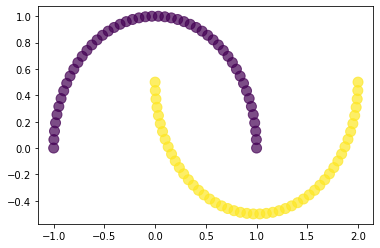

In [38]:
X1, y1 = datasets.make_moons(n_samples=100, random_state=42)
plt.scatter(X1[:,0], X1[:,1], s=100, c=y1, alpha=0.7)

plt.show()

#### Генерация второго набора данных.

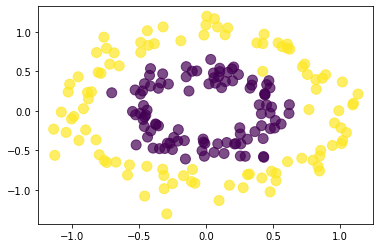

In [39]:
X2, y2 = datasets.make_circles(n_samples=200, factor=0.5, noise=0.1)

plt.scatter(X2[:,0], X2[:,1], s=100, c=-y2, alpha=0.7)
plt.show()

#### Генерация третьего набора данных

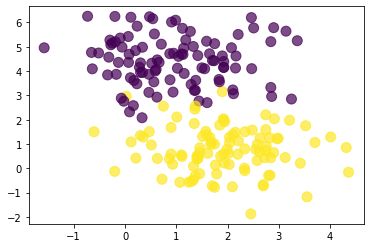

In [40]:
X3, y3 = datasets.make_blobs(n_samples=200, centers=2, n_features=2, random_state=0)

plt.scatter(X3[:,0], X3[:,1], s=100, c=y3, alpha=0.7)
plt.show()

#### Разделение первого набора данных на train и test множества (80:20)

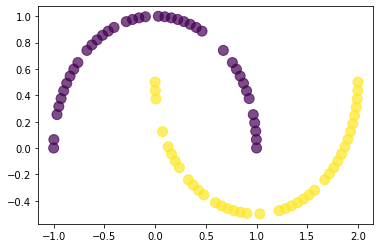

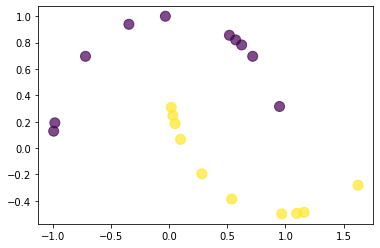

In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.8, random_state=42, stratify=y1, shuffle=True)

plt.scatter(X1_train[:,0], X1_train[:,1], s=100, c=y1_train, alpha=0.7)
plt.show()

plt.scatter(X1_test[:,0], X1_test[:,1], s=100, c=y1_test, alpha=0.7)
plt.show()

#### Разделение второго набора данных на train и test множества (80:20)

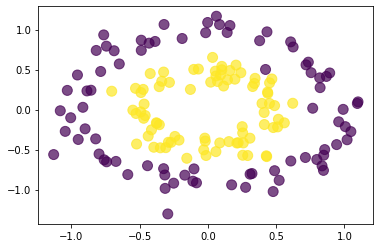

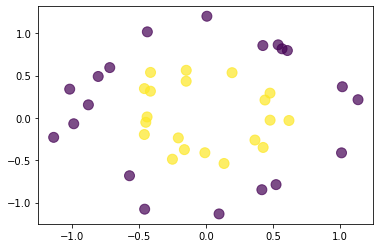

In [42]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.8, random_state=42, stratify=y2, shuffle=True)

plt.scatter(X2_train[:,0], X2_train[:,1], s=100, c=y2_train, alpha=0.7)
plt.show()

plt.scatter(X2_test[:,0], X2_test[:,1], s=100, c=y2_test, alpha=0.7)
plt.show()

#### Разделение третьего набора данных на train и test множества (80:20)

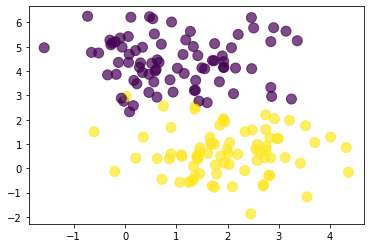

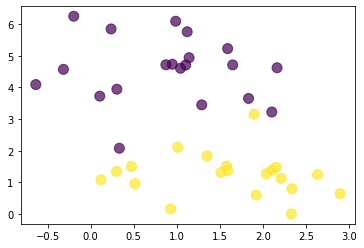

In [43]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.8, random_state=42, stratify=y3, shuffle=True)

plt.scatter(X3_train[:,0], X3_train[:,1], s=100, c=y3_train, alpha=0.7)
plt.show()

plt.scatter(X3_test[:,0], X3_test[:,1], s=100, c=y3_test, alpha=0.7)
plt.show()

#### Реализация метода ближайших соседей

In [44]:
class KNN(object):
    
    # конструктор
    def __init__(self, k):
        self.k = k
    
    # обучение, тренировка
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    # предсказание, вывод (определение метки класса для нового примера)
    def predict(self, XT):
        y = np.zeros(len(XT))
        
        # для каждого примера XT[i]
        # вычислить расстояния от XT[i] до self.X[j]
        for i, x in enumerate(XT):
            sl = SortedList()
            # по обучающей выборке
            for j, x_train in enumerate(self.X):
                diff = x - x_train
                dist = diff.dot(diff)
                if (len(sl) < self.k):
                    sl.add( (dist, self.y[j]) )
                else:
                    if (dist < sl[-1][0]):
                        del sl[-1]
                        sl.add( (dist, self.y[j]) )
        
        
            # для _k_ ближайших к XT[i] соседей:
              # определить наиболее часто встречающийся класс (C),
                # положить yt[i] = (C)
        
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v,0) + 1
        
            
            max_votes = 0
            max_votes_class = -1
            
            for v, count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
                    
            y[i] = max_votes_class
        
        return y
        
        
    def score(self, testX, testY):
        return np.mean(self.predict(testX) == testY)*100
        

#### Обучение и тестирование KNN на первом наборе данных

In [51]:
# обучение метода на тренировочной выборке
knn_cls = KNN(8)
knn_cls.fit(X1_train, y1_train)

# предсказание меток класа для тестовой выборки
y1_pred = knn_cls.predict(X1_test)

In [52]:
# измерение качества на тренировочной выборке
knn_cls.score(X1_train, y1_train)

100.0

In [53]:
# измерение качества метода на тестовой выборке
knn_cls.score(X1_test, y1_test)

100.0

In [54]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [72]:
# матрица расхождений
labels = y1_test
predictions = y1_pred

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(cm)

[[10  0]
 [ 0 10]]


#### Обучение и тестирование KNN на втором наборе данных

In [36]:
knn_cls = KNN(7)
knn_cls.fit(X2_train, y2_train)
y2_pred = knn_cls.predict(X2_test) 

In [57]:
# измерение качества на тренировочной выборке
knn_cls.score(X2_train, y2_train)

71.25

In [58]:
# измерение качества метода на тестовой выборке
knn_cls.score(X2_test, y2_test)

70.0

In [59]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [71]:
# матрица расхождений
labels = y2_test
predictions = y2_pred

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(cm)

[[19  1]
 [ 0 20]]


#### Обучение и тестирование KNN на третьем наборе данных

In [61]:
knn_cls = KNN(5)
knn_cls.fit(X3_train, y3_train)
y3_pred = knn_cls.predict(X3_test)

In [62]:
# измерение качества на тренировочной выборке
knn_cls.score(X3_train, y3_train)

98.75

In [63]:
# измерение качества метода на тестовой выборке
knn_cls.score(X3_test, y3_test)

97.5

In [64]:
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [70]:
# матрица расхождений
labels = y3_test
predictions = y3_pred

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(cm)

[[20  0]
 [ 1 19]]


# 
# Задание 2

In [73]:
C = 'Cat'
F = 'Fish'
H = 'Hen'

# истинные значения
y_true = [C,C,C,C,C,C,F,F,F,F,F,F,F,F,F,F,H,H,H,H,H,H,H,H,H]
# предсказанные значения
y_pred = [C,C,C,C,H,F,C,C,C,C,C,C,H,H,F,F,C,C,C,H,H,H,H,H,H]

### Рассчитаем матрицу ошибок и метрики для класса C

In [74]:
c_true = []
c_pred = []

for i in y_true:
    if (i == C): 
        c_true.append(1)
    else: c_true.append(0)    
        

for j in y_pred:
    if (j == C): 
        c_pred.append(1)
    else: c_pred.append(0)
        
print('c_true = ', c_true)
print('c_pred = ', c_pred)

c_true =  [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
c_pred =  [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [75]:
TP_C = 0
FP_C = 0
FN_C = 0
TN_C = 0

for i in range(len(y_true)):
    if (c_true[i] == 1 and c_pred[i] == 1): TP_C += 1
    elif (c_true[i] == 1 and c_pred[i] == 0): FN_C += 1   
    elif (c_true[i] == 0 and c_pred[i] == 1): FP_C += 1 
    else: TN_C += 1

print('TP_C = {}, FP_C = {}, FN_C = {}, TN_C = {}'.format(TP_C, FP_C, FN_C, TN_C))

TP_C = 4, FP_C = 9, FN_C = 2, TN_C = 10


In [76]:
precision_c = TP_C/(TP_C + FP_C)
recall_c = TP_C/(TP_C + FN_C) 
f1_score_c = 2 * (precision_c * recall_c)/(1 * precision_c + recall_c)
                    
print('Precision C = ', round(precision_c, 3))
print('Recall C = ', round(recall_c, 3))
print('F1-score C = ', round(f1_score_c, 3))

Precision C =  0.308
Recall C =  0.667
F1-score C =  0.421


### Рассчитаем матрицу ошибок и метрики для класса F

In [77]:
f_true = []
f_pred = []

for i in y_true:
    if (i == F): 
        f_true.append(1)
    else: f_true.append(0)    
        

for j in y_pred:
    if (j == F): 
        f_pred.append(1)
    else: f_pred.append(0)
        
print('f_true = ', f_true)
print('f_pred = ', f_pred)

f_true =  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f_pred =  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [78]:
TP_F = 0
FP_F = 0
FN_F = 0
TN_F = 0

for i in range(len(y_true)):
    if (f_true[i] == 1 and f_pred[i] == 1): TP_F += 1
    elif (f_true[i] == 1 and f_pred[i] == 0): FN_F += 1   
    elif (f_true[i] == 0 and f_pred[i] == 1): FP_F += 1 
    else: TN_F += 1

print('TP_F = {}, FP_F = {}, FN_F = {}, TN_F = {}'.format(TP_F, FP_F, FN_F, TN_F))

TP_F = 2, FP_F = 1, FN_F = 8, TN_F = 14


In [79]:
precision_f = TP_F/(TP_F + FP_F)
recall_f = TP_F/(TP_F + FN_F) 
f1_score_f = 2 * (precision_f * recall_f)/(1 * precision_f + recall_f)
                    
print('Precision F = ', round(precision_f, 3))
print('Recall F = ', round(recall_f, 3))
print('F1-score F = ', round(f1_score_f, 3))

Precision F =  0.667
Recall F =  0.2
F1-score F =  0.308


### Рассчитаем матрицу ошибок и метрики для класса H

In [80]:
h_true = []
h_pred = []

for i in y_true:
    if (i == H): 
        h_true.append(1)
    else: h_true.append(0)    
        

for j in y_pred:
    if (j == H): 
        h_pred.append(1)
    else: h_pred.append(0)
        
print('h_true = ', h_true)
print('h_pred = ', h_pred)

h_true =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
h_pred =  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [81]:
TP_H = 0
FP_H = 0
FN_H = 0
TN_H = 0

for i in range(len(y_true)):
    if (h_true[i] == 1 and h_pred[i] == 1): TP_H += 1
    elif (h_true[i] == 1 and h_pred[i] == 0): FN_H += 1   
    elif (h_true[i] == 0 and h_pred[i] == 1): FP_H += 1 
    else: TN_H += 1

print('TP_H = {}, FP_H = {}, FN_H = {}, TN_H = {}'.format(TP_H, FP_H, FN_H, TN_H))

TP_H = 6, FP_H = 3, FN_H = 3, TN_H = 13


In [82]:
precision_h = (TP_H/(TP_H + FP_H))
recall_h = (TP_H/(TP_H + FN_H))
f1_score_h = (2 * (precision_h * recall_h)/(1 * precision_h + recall_h))
                    
print('Precision H = ', round(precision_h, 3))
print('Recall H = ', round(recall_h, 3))
print('F1-score H = ', round(f1_score_h, 3))

Precision H =  0.667
Recall H =  0.667
F1-score H =  0.667


### Рассчитаем macro_avg и weighted_avg для вычесленных метрик

In [83]:
# список всех метрик precision
precision_all = [precision_c, precision_f, precision_h]

# список всех метрик recall
recall_all = [recall_c, recall_f, recall_h]

# список всех метрик f1-score
f1_score_all = [f1_score_c, f1_score_f, f1_score_h]

In [84]:
# рассчитываем macro_avg для всех меток
macro_avg_precision = sum(precision_all) / len(precision_all)
macro_avg_recall = sum(recall_all) / len(recall_all)
macro_avg_f1_score = sum(f1_score_all) / len(f1_score_all)

In [85]:
# рассчитываем weighted_avg для всех меток
weighted_avg_precision = precision_c*sum(map(lambda item: item == 1, c_true))/len(c_true) + precision_f*sum(map(lambda item: item == 1, f_true))/len(f_true) + precision_h*sum(map(lambda item: item == 1, h_true))/len(h_true)
weighted_avg_recall = recall_c*sum(map(lambda item: item == 1, c_true))/len(c_true) + recall_f*sum(map(lambda item: item == 1, f_true))/len(f_true) + recall_h*sum(map(lambda item: item == 1, h_true))/len(h_true)
weighted_avg_f1_score = f1_score_c*sum(map(lambda item: item == 1, c_true))/len(c_true) + f1_score_f*sum(map(lambda item: item == 1, f_true))/len(f_true) + f1_score_h*sum(map(lambda item: item == 1, h_true))/len(h_true)

### Результаты расчетов в виде итоговой таблицы

In [86]:
import pandas as pd

metrics = {'precision': precision_all, 'recall': recall_all, 'f-score': f1_score_all}
df = pd.DataFrame(metrics, index =['Cat', 'Fish', 'Hen']) 
df

,precision,recall,f-score
Cat,0.307692,0.666667,0.421053
Fish,0.666667,0.200000,0.307692
Hen,0.666667,0.666667,0.666667


In [92]:
metrics2 = {'precision': [macro_avg_precision, weighted_avg_precision], 'recall': [macro_avg_recall, weighted_avg_recall], 'f-score': [macro_avg_f1_score, weighted_avg_f1_score]}
df2 = pd.DataFrame(metrics2, index =['macro avg', 'weighted avg']) 
df2

,precision,recall,f-score
macro avg,0.547009,0.511111,0.465137
weighted avg,0.580513,0.480000,0.464130


In [93]:
# в качестве проверки используем встроенный метод sckikit-learn

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         Cat       0.31      0.67      0.42         6
        Fish       0.67      0.20      0.31        10
         Hen       0.67      0.67      0.67         9

    accuracy                           0.48        25
   macro avg       0.55      0.51      0.47        25
weighted avg       0.58      0.48      0.46        25



# 
# Задание 3

### Этот набор данных содержит данные о пациентах медицинского учреждения. Нужно спрогназировать расходы на медицинское страхование.

In [199]:
from sklearn.linear_model import LinearRegression
import pandas as pd

data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [201]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [202]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [203]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### Преобразуем каегориальные данные

In [204]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data_sex = LabelEncoder()
data_smk = LabelEncoder()

data_sex.fit(data['sex'].drop_duplicates())
data_smk.fit(data['smoker'].drop_duplicates())

data['sex_e'] = data_sex.transform(data['sex'])
data['smoker_e'] = data_smk.transform(data['smoker'])

# преобразуем столбцы
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['region'])],
    remainder='passthrough'
)

transformed = ct.fit_transform(data)

data = pd.DataFrame(transformed,
                            columns = ct.get_feature_names_out())

# переименовываем столбцы
data.columns = ['region_northeast',
                        'region_northwest',
                        'region_southeast',
                        'region_southwest',
                        'age',
                        'sex',
                        'bmi',
                        'children',
                        'smoker',
                        'charges',
                        'sex_e',
                        'smoker_e']

data = data[['age',
                             'sex',
                             'sex_e',
                             'bmi',
                             'children',
                             'smoker',
                             'smoker_e',
                             'region_northeast',
                             'region_northwest',
                             'region_southeast',
                             'region_southwest',
                             'charges']]

#### Получаем преобразованный датасет

In [205]:
new_data = data[['age',
                               'sex_e',
                               'bmi',
                               'children',
                               'smoker_e',
                               'region_northeast',
                               'region_northwest',
                               'region_southeast',
                               'region_southwest',
                               'charges']]

new_data = new_data.apply(pd.to_numeric)

In [206]:
# преобразованный датасет
new_data.head()

,age,sex_e,bmi,children,smoker_e,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520


In [210]:
df_corr = new_data[['age',
                          'sex_e',
                          'bmi',
                          'children',
                          'smoker_e',
                          'charges']].corr(method='pearson')

df_corr.head()

,age,sex_e,bmi,children,smoker_e,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex_e,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker_e,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251


#### Создаем фрейм для признаков

In [211]:
df_features = new_data[['age',
                              'bmi',
                              'children',
                              'smoker_e',
                              'charges']]
df_features.head()

,age,bmi,children,smoker_e,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [212]:
x = df_features.iloc[:,0:-1]
y = df_features.iloc[:, -1]

#### Делим датасет на тестовую и тренировочную выборки 

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.2)

#### Обучаем модель

In [214]:
lr_model = LinearRegression(fit_intercept=True)

lr_model.fit(x_train,
             y_train)

LinearRegression()

#### Предсказываем целевой признак

In [215]:
pred_train = lr_model.predict(x_train)
pred_test = lr_model.predict(x_test)

In [218]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_train = mean_squared_error(pred_train, y_train)
sqrt_mse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(pred_train, y_train)

mse_test = mean_squared_error(pred_test, y_test)
sqrt_mse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(pred_test, y_test)

print('MSE train = ', mse_train)
print('SQRT MSE train = ', sqrt_mse_train)
print('MAE train = ', mae_train)

print('MSE test = ', mse_test)
print('SQRT MSE test = ', sqrt_mse_test)
print('MAE test = ', mae_test)

MSE train =  37369598.44540845
SQRT MSE train =  6113.067842369202
MAE train =  4210.664111721688
MSE test =  33981653.950197764
SQRT MSE test =  5829.378521780668
MAE test =  4213.7985945272485


In [217]:
df_coef = pd.DataFrame(lr_model.coef_, 
                       x_train.columns,
                       columns=['Coef'])

df_coef

,Coef
age,257.071158
bmi,327.522631
children,427.199971
smoker_e,23653.211646
